In [46]:
print('hello')

hello


In [47]:
!pip install numpy pandas matplotlib scikit-learn

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
dataset = pd.read_csv("D:\Samir\AiLab\iris.csv")
dataset.sample(7)

<>:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Acer\AppData\Local\Temp\ipykernel_14660\1822594248.py:1: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  dataset = pd.read_csv("D:\Samir\AiLab\iris.csv")


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,6.5,3.0,5.5,1.8,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
x= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [53]:
dataset.duplicated().sum()

np.int64(3)

In [54]:
dataset.duplicated().value_counts()

False    147
True       3
Name: count, dtype: int64

In [55]:
dataset.drop_duplicates(inplace=True)

In [56]:
dataset.shape

(147, 5)

In [57]:
count= dataset['Species'].value_counts()
count

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

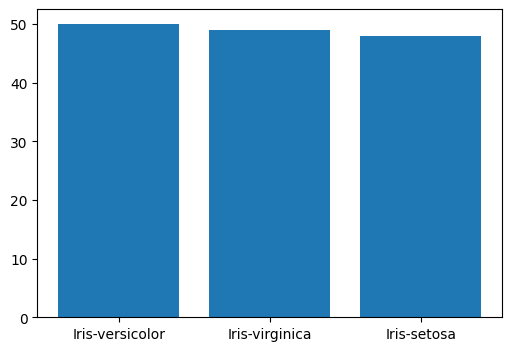

In [58]:
plt.figure(figsize=(6,4))
plt.bar(x = count.index,height= count.values )
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
x_train.shape ,x_test.shape

((120, 4), (30, 4))

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, ConfusionMatrixDisplay,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [63]:
cfl = KNeighborsClassifier(n_neighbors= 7)
cfl.fit(x_train,y_train)
y_pred = cfl.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [65]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [66]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

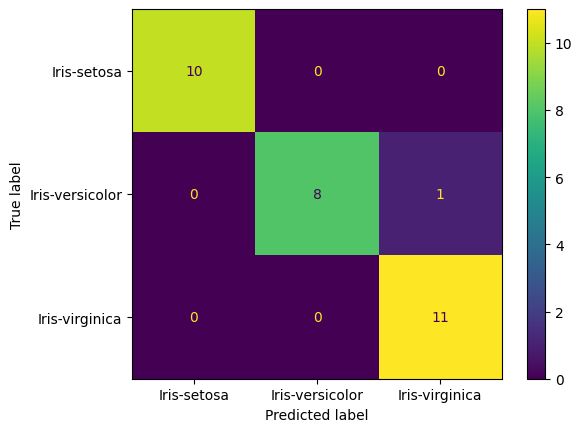

In [67]:
cm_plot = ConfusionMatrixDisplay(
    confusion_matrix= cm, display_labels=dataset['Species'].unique()
)
cm_plot.plot()
plt.show()

In [68]:
import joblib
joblib.dump(cfl,'knn_model.joblib')
print("success")

success


In [ ]:
sample = x_test.sample()
sample_data = cfl.predict(sample)
